In [1]:
# Gray / Black & White Image Detector #

In [2]:
# Importing Libraries

import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageStat

In [3]:
def detect_color(file, thumb_size=50, mse_limit=30, adjust_color_bias=True):
    opencv_image = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    img = Image.fromarray(opencv_image)
    # pil_img = Image.open(file)

    bands = img.getbands()
    if bands == ('R', 'G', 'B') or bands == ('R', 'G', 'B', 'A'):
        thumb = img.resize((thumb_size, thumb_size))
        sse, bias = 0, [0, 0, 0]

        if adjust_color_bias:
            bias = ImageStat.Stat(thumb).mean[:3]
            bias = [b - sum(bias) / 3 for b in bias]

        for pixel in thumb.getdata():
            mu = sum(pixel) / 3
            sse += sum((pixel[i] - mu - bias[i]) * (pixel[i] - mu - bias[i]) for i in [0, 1, 2])
        
        mse = float(sse) / (thumb_size * thumb_size)

        if mse <= mse_limit:   # If Not Colored
            return False

        else:                  # If Colored
            return True

    else:                      # If Not Colored
        return False


def color_info(file):
    if detect_color(file):
        print("The Image is Colored")
    else:
        print("The Image is Uncolored")


def plot_image(file):
    image = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    print("Shape:", image.shape)
    i = image.shape[1] / image.shape[0]
    plt.figure(figsize=(int(6 * i), 6)); plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

The Image is Colored
Shape: (498, 719, 3)


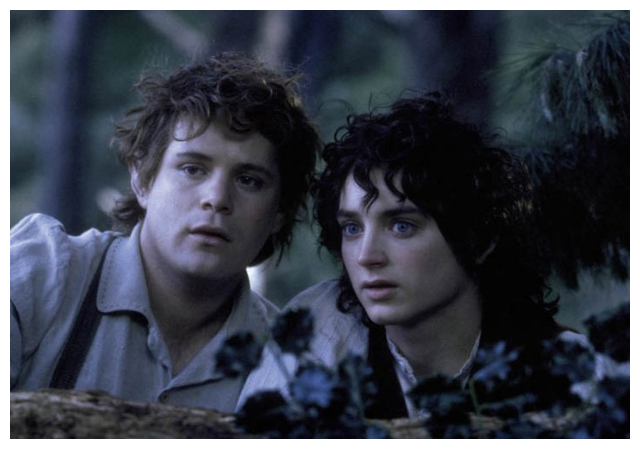

In [4]:
file="./images/frodo_sam.jpg"
color_info(file)
plot_image(file)

The Image is Uncolored
Shape: (468, 474, 3)


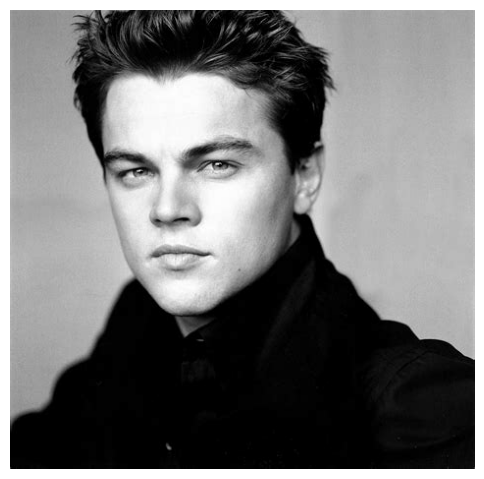

In [5]:
file="./images/leonardo.jpg"
color_info(file)
plot_image(file)

The Image is Uncolored
Shape: (474, 474)


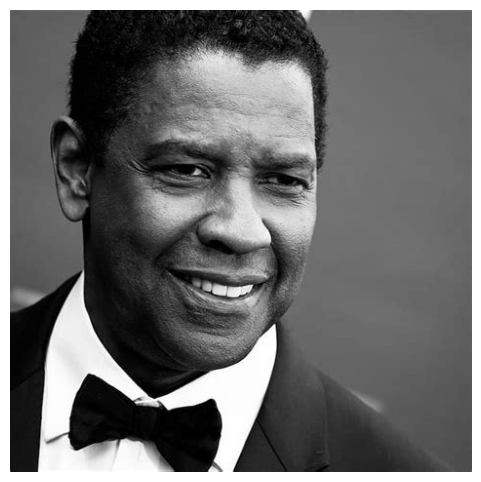

In [6]:
file="./images/denzel.jpg"
color_info(file)
plot_image(file)